#### Project Name: "E-commerce Product Analysis: Understanding Sales Patterns and Optimizing Supply Chain"

* Abstract:- The objective of this project is to analyze sales data from an e-commerce platform and optimize the supply chain process.i aim to identify key insights and patterns that can enhance decision-making and drive business growth. This project provides a comprehensive data analysis solution for e-commerce companies, offering actionable recommendations for improving sales performance and supply chain efficiency

#### 1.Data Exploration and Preprocessing

In [1]:
## importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## loading the data set
sdata=pd.read_csv("supply_chain_data.csv")   ## sdata means supply chain data 

In [4]:
sdata

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


In [5]:
## initial exploration
sdata.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [6]:
sdata.shape   ## size of the data

(100, 24)

In [7]:
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
## statistical summary of numerical columns
sdata.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [9]:
## handling the missing values 
sdata.isnull().sum()          ## there is no null values in the data set. it is clean and perfect

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

#### 2. Descriptive Analysis:

In [10]:
## descriptive statistics
sdata.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [11]:
sdata['Price'].describe()   ## statistics of the price column

count    100.000000
mean      49.462461
std       31.168193
min        1.699976
25%       19.597823
50%       51.239831
75%       77.198228
max       99.171329
Name: Price, dtype: float64

#### 3.Data Visulization
* 1.Histogram

In [14]:

## extracting the data from the main table 
price=sdata['Price']
availability=sdata['Availability']

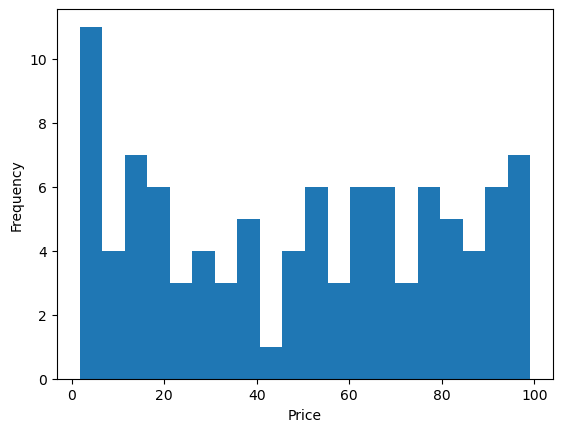

In [15]:
## creating histogram for the price variable
plt.hist(price,bins=20)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

* The plot will be showing the distribution of prices for different products

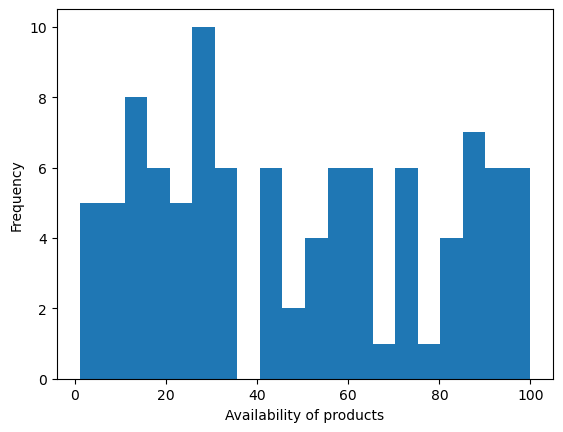

In [33]:
## creating the histogram for the availability variable
plt.hist(availability,bins=20)
plt.xlabel("Availability of products")
plt.ylabel("Frequency")
plt.show()

* This above histogram plot showing the distribution of product availability.
* for example :-In our histogram, if the value of "Availability" is 40 and the corresponding frequency is 6, it indicates that there are 6 products in our data that have an availability of 40.

2. Bar Chart

In [36]:
## Creating bar charts for 'product type' and 'customer demographics'
product_counts=sdata['Product type'].value_counts()
customer_counts=sdata['Customer demographics'].value_counts()

In [37]:
product_counts

skincare     40
haircare     34
cosmetics    26
Name: Product type, dtype: int64

In [38]:
customer_counts

Unknown       31
Female        25
Non-binary    23
Male          21
Name: Customer demographics, dtype: int64

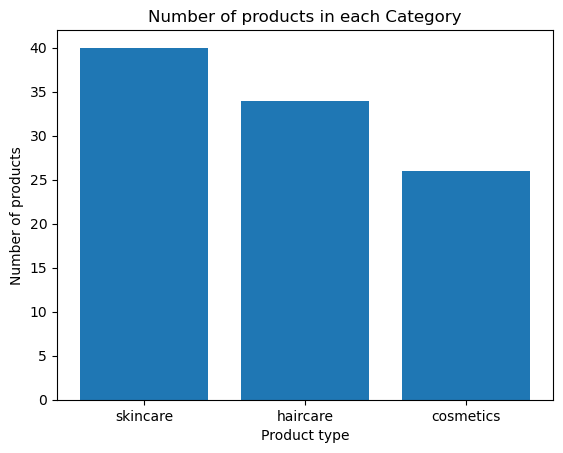

In [42]:
## creating the bar charts for product type
plt.bar(product_counts.index,product_counts.values)
plt.xlabel("Product type")
plt.ylabel("Number of products")
plt.title("Number of products in each Category")
plt.show()

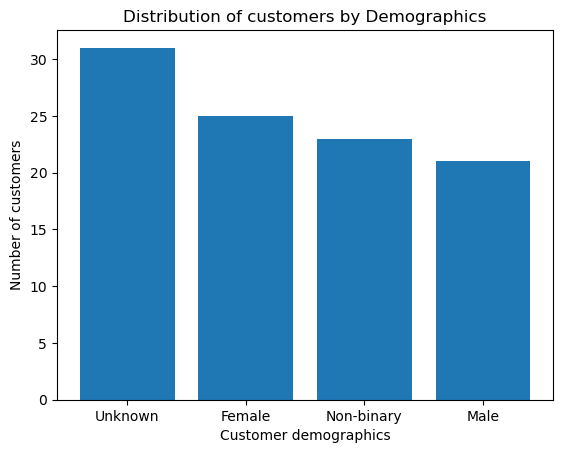

In [44]:
## cretting the barchar for customer demographics
plt.bar(customer_counts.index,customer_counts.values)
plt.xlabel("Customer demographics")
plt.ylabel("Number of customers")
plt.title("Distribution of customers by Demographics")
plt.show()

* the above bar chart showing the distribution of customers based on their gender or non-binary identity. The x-axis will display the different demographics categories (e.g., male, female, non-binary), and the y-axis will show the corresponding counts.

3. Box Plot
* creating the box plots for the variables "Revenue generated" and "Lead times" in our dataset

In [17]:
revenue=sdata["Revenue generated"]
lead_times=sdata['Lead times']

Text(0.5, 1.0, 'revenue distribution')

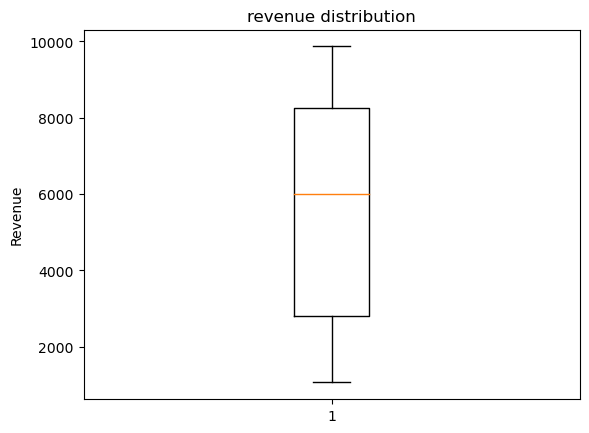

In [19]:
## revenue distribution
plt.boxplot(revenue)
plt.ylabel("Revenue")
plt.title("revenue distribution")

* This box plot showing the distribution of revenue generated across all product categories. The box represents the interquartile range (IQR), with the median indicated by the horizontal line within the box. Any outliers are displayed as individual points outside the whiskers.

In [25]:
import seaborn as sns

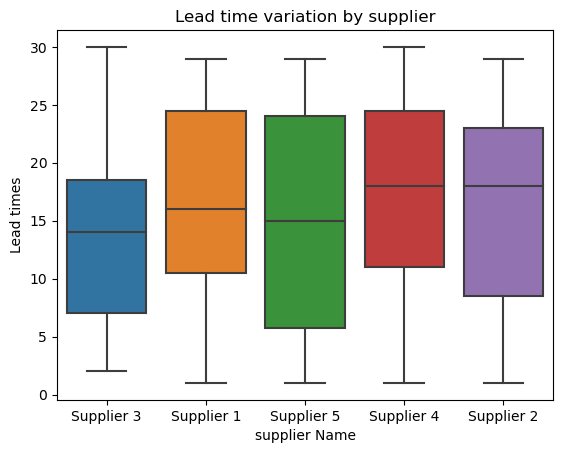

In [27]:
## creating the box plot for the "lead time variable"
sns.boxplot(x=sdata["Supplier name"],y=lead_times)
plt.xlabel("supplier Name")
plt.ylabel("Lead times")
plt.title("Lead time variation by supplier")
plt.xticks(None)
plt.show()

* This box plot comparing the lead times for different suppliers. Each box represents the distribution of lead times for a specific supplier. The x-axis displays the supplier names, and the y-axis represents the lead times. This plot allows you to identify any outliers or variations in lead times across different suppliers.
* By analyzing these box plots, we can compare the revenue generated across product categories and identify any variations or outliers in lead times for different suppliers. These visualizations provide a clear overview of the distribution and variability of these variables in our data

4. Scatter plot

In [32]:
price=sdata['Price']
revenue=sdata['Revenue generated']
stock_levels=sdata['Stock levels']
num_product_sold=sdata['Number of products sold']

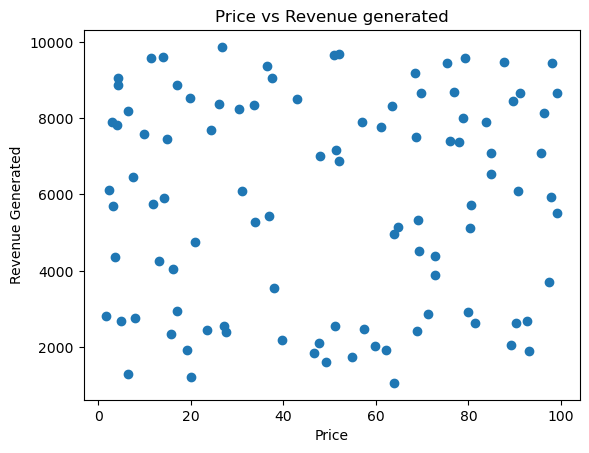

In [33]:
## creating the revenue plot prcie vs revenue generated 
plt.scatter(price,revenue)
plt.xlabel("Price")
plt.ylabel("Revenue Generated")
plt.title("Price vs Revenue generated")
plt.show()

* This scatter plot shows  with the price of the product on the x-axis and the revenue generated on the y-axis. The scatter plot will show how the price and revenue are related for different products. we can observe any patterns or relationships between these two variables. 

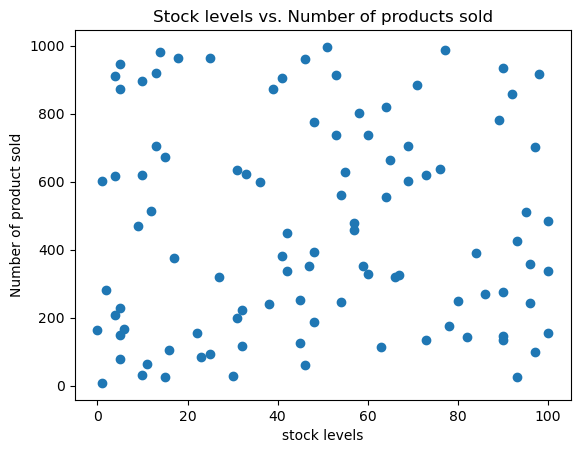

In [36]:
## creating the scatter plot for "Stock levels vs. Number of products sold"
plt.scatter(stock_levels,num_product_sold)
plt.xlabel("stock levels")
plt.ylabel("Number of product sold")
plt.title("Stock levels vs. Number of products sold")
plt.show()


5. line chart

In [39]:
production_volumes=sdata['Production volumes']
manufacturing_costs=sdata['Manufacturing costs']
lead_time=sdata['Lead time']

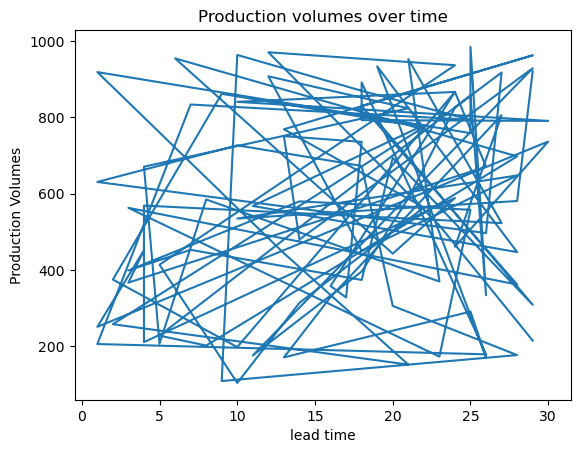

In [41]:
## creating the line plot for "Production volumes over time"
plt.plot(lead_time,production_volumes)
plt.xlabel("lead time")
plt.ylabel("Production Volumes")
plt.title("Production volumes over time")
plt.show()

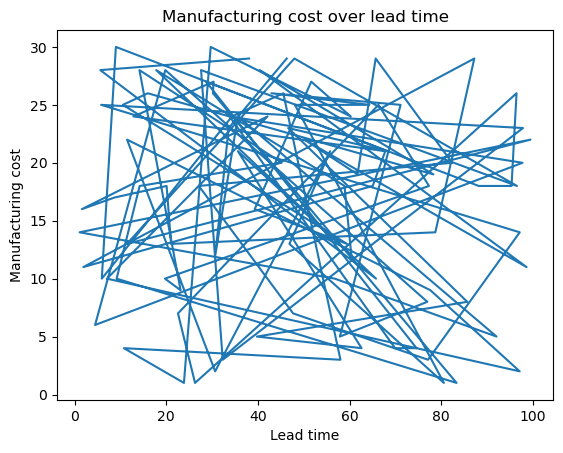

In [42]:
## creating the line plot for manufacturing cost over lead time 
plt.plot(manufacturing_costs,lead_time)
plt.xlabel("Lead time")
plt.ylabel("Manufacturing cost")
plt.title("Manufacturing cost over lead time")
plt.show()

* the line plot displaying the changes in manufacturing costs over a specific period. The x-axis represents time, and the y-axis represents the manufacturing costs. The line plot helps visualize the fluctuations and trends in manufacturing costs over time, providing insights into cost variations or cost-saving measures.

* By examining these line plots, you can observe the overall trend, seasonality, or any significant changes in production volumes and manufacturing costs over time. These plots can help identify patterns and guide decision-making processes related to production planning, cost management, and resource allocation.

6. Heat Map

In [44]:
numeric_columns=['Price','Revenue generated','Availability']
numeric_data=sdata[numeric_columns]

In [45]:
## computing the corelation matrix
correlation_matrix=numeric_data.corr()

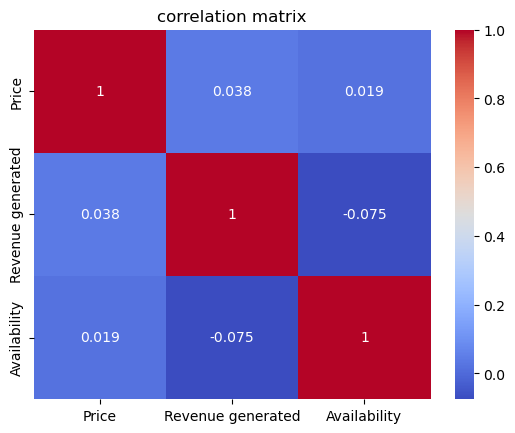

In [48]:
## creating the heat pump
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("correlation matrix")
plt.show()

* The heatmap visualizing the correlation between the selected numeric variables. The heatmap uses a color scale to represent the strength and direction of the correlation. The values in the cells of the heatmap indicate the correlation coefficient, with higher values indicating stronger positive or negative correlations.
* By examining the heatmap, we can identify relationships between variables. For example, a high positive correlation between price and revenue generated suggests that higher-priced products tend to generate more revenue. A negative correlation between availability and revenue generated implies that higher availability may lead to lower revenue.

#### 4.Sales Performance Analysis

In [10]:
## 1. Calculating the total revenue
total_revenue=sdata['Revenue generated'].sum()
print("Total Revenue =",total_revenue,"Rs")

Total Revenue = 577604.8187380086 Rs


In [9]:
## 2.Caluculating the average revenue per product
total_revenue=sdata['Revenue generated'].sum()
total_product_sold=sdata['Number of products sold'].sum()
average_revenue_per_product=total_revenue/total_product_sold
print("Average Revenue per Product=",average_revenue_per_product,"Rs")

Average Revenue per Product= 12.52966048586756 Rs


In [11]:
##3.Analysing the revenue by customer segment or product category
grouped_data=sdata.groupby("Customer demographics")  ## grouping the data

# calcualting revenue by each segment
revenue_by_segment=grouped_data["Revenue generated"].sum()  

print("Revenue by Customer Segment",revenue_by_segment)

Revenue by Customer Segment Customer demographics
Female        161514.489122
Male          126634.394260
Non-binary    116365.801520
Unknown       173090.133837
Name: Revenue generated, dtype: float64


In [9]:
## 4. Identifying the Tope selling products


#Calculating the total_revenue Generated for each product
product_revenue=sdata.groupby('SKU')['Revenue generated'].sum()

# sorting the products based on total revenue in descending order
top_selling_products=product_revenue.sort_values(ascending=False)

## chossing the top 5 selling products
top5_products=top_selling_products.head(5)

# calculating the contribution of each top selling product to overall revenue
total_revenue=sdata['Revenue generated'].sum()
contribution=top5_products/total_revenue

## printing the top selling products and their contribution to revenue 
print("Top Selling Products:",top5_products)
print("Contribution to overall revenue:",contribution)

Top Selling Products: SKU
SKU51    9866.465458
SKU38    9692.318040
SKU31    9655.135103
SKU90    9592.633570
SKU2     9577.749626
Name: Revenue generated, dtype: float64
Contribution to overall revenue: SKU
SKU51    0.017082
SKU38    0.016780
SKU31    0.016716
SKU90    0.016608
SKU2     0.016582
Name: Revenue generated, dtype: float64


#### 5.Supply Chain Optimization

* Analyzing the stock levels, lead times, order quantities, and manufacturing aspects.

In [11]:
## Calculating the stock levels and identify stockouts or excess inventory.


## calculating the stock level
stock_level=sdata['Stock levels']

# identifying the stockouts (inventory rreaches zero)
stockout=sdata[sdata['Stock levels']==0]

## identifying the excess inventory
threshold=100
excess_inventory=sdata[sdata['Stock levels']>threshold]

In [12]:
print(stock_level)
print(stockout)
print(excess_inventory)

0     58
1     53
2      1
3     23
4      5
      ..
95    15
96    67
97    46
98    53
99    55
Name: Stock levels, Length: 100, dtype: int64
   Product type    SKU      Price  Availability  Number of products sold  \
68     haircare  SKU68  37.931812            29                      163   

    Revenue generated Customer demographics  Stock levels  Lead times  \
68        3550.218433            Non-binary             0           8   

    Order quantities  ...   Location Lead time  Production volumes  \
68                58  ...  Bangalore         2                 375   

   Manufacturing lead time Manufacturing costs  Inspection results  \
68                      18           97.113582                Fail   

    Defect rates  Transportation modes   Routes       Costs  
68      1.983468                  Rail  Route A  299.706303  

[1 rows x 24 columns]
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demogra

In [13]:
# Calculate average lead time
average_lead_time = sdata['Lead times'].mean()

# Identify delays (lead times above a threshold)
delays = sdata[sdata['Lead times'] > threshold]


In [16]:
print(average_lead_time)
print(delays)

15.96
Empty DataFrame
Columns: [Product type, SKU, Price, Availability, Number of products sold, Revenue generated, Customer demographics, Stock levels, Lead times, Order quantities, Shipping times, Shipping carriers, Shipping costs, Supplier name, Location, Lead time, Production volumes, Manufacturing lead time, Manufacturing costs, Inspection results, Defect rates, Transportation modes, Routes, Costs]
Index: []

[0 rows x 24 columns]


#### Conclusion

* In this project, i conducted a thorough analysis of sales data from an e-commerce platform to gain insights into sales patterns and optimize the supply chain process. Through data exploration and preprocessing, i ensured the quality and reliability of the dataset, addressing missing values, outliers, and inconsistencies.

* By leveraging descriptive analysis techniques and data visualization, i identified key trends and relationships among variables such as revenue, product categories, customer segments, and pricing. This enabled us to understand the distribution and central tendencies of the data, as well as the top-selling products and their contribution to overall revenue.
* Furthermore, i delved into supply chain optimization by analyzing stock levels, lead times. This provided valuable insights into potential bottlenecks and inefficiencies, allowing for informed decision-making to streamline the supply chain process.

* my findings and recommendations offer actionable insights for e-commerce companies to enhance their sales performance and improve supply chain efficiency. By implementing our proposed solutions, such as optimizing transportation routes, reducing lead times, and identifying top-performing suppliers, businesses can expect improved sales growth, cost savings, and enhanced customer satisfaction.

* In summary, this project serves as a comprehensive data analysis solution for e-commerce companies, empowering them to make data-driven decisions and drive sustainable business growth.